In [51]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.six import StringIO
from rdkit.Chem import Descriptors3D
from rdkit.Chem import Descriptors
import pandas as pd 
import numpy as np 

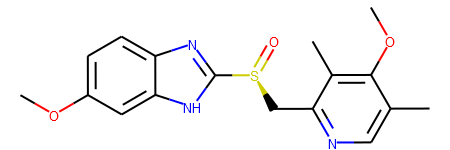

In [52]:
#reading_molecules!
#chem package THE MODULE MolfromSmiles--- it gives us the structure of molecular structure! 
mol1 = Chem.MolFromSmiles('COc1ccc2c(c1)[nH]c(n2)[S@@](=O)Cc1ncc(c(c1C)OC)C')
mol1

In [53]:
mol1 = Chem.MolFrom # like that we can get the details of structrure from different files like smiles , pdb, etc!! 


AttributeError: module 'rdkit.Chem' has no attribute 'MolFrom'

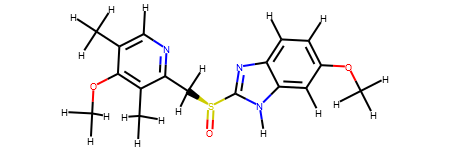

In [54]:
#adding hydrogens can be done by! 
mol_exampleH = Chem.AddHs(mol1)
mol_exampleH
#here with the help of Chem package we can able to delete or add the HYDROGENS !  
#try to look over all the features in CHEM ! 

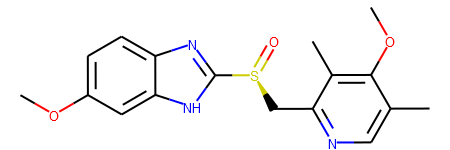

In [55]:
mol_exampleH1 = Chem.RemoveHs(mol1)
mol_exampleH1

In [56]:
#we can able to covert the files into SDF file !!! 
w1 = Chem.SDWriter('./data/data_set.sdf') #now the file has been uploaded in my folder where i created!!
w1.write(mol_exampleH)
w1.close()

In [57]:
#similarity_calculation! 
mol1 = Chem.MolFromSmiles("Cc1ccccc1")
mol2 = Chem.MolFromSmiles("Clc1ccccc1")

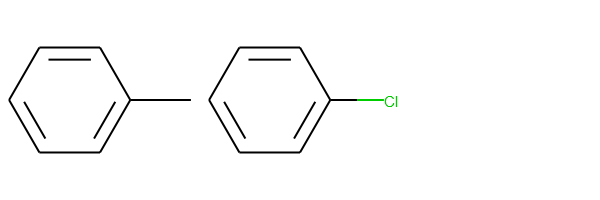

In [58]:
Draw.MolsToGridImage([mol1, mol2])

In [59]:
fp1 = AllChem.GetMorganFingerprint(mol1, 2)
fp2 = AllChem.GetMorganFingerprint(mol2, 2)

In [60]:

DataStructs.TanimotoSimilarity(fp1, fp2)

0.5384615384615384

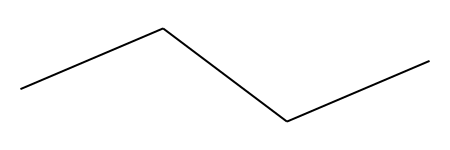

In [61]:
#if you want to draw and genrate your own SMILES u can create our own using CHEMINFO.ORG or anyother modeling software we can able to genrate and open her
mol = Chem.MolFromSmiles('CCCC')
mol

In [62]:
smiles = Chem.MolToSmiles(mol)
smiles

'CCCC'

In [63]:
#molecular_weight!
mw = Descriptors.MolWt(mol)
mw


58.123999999999995

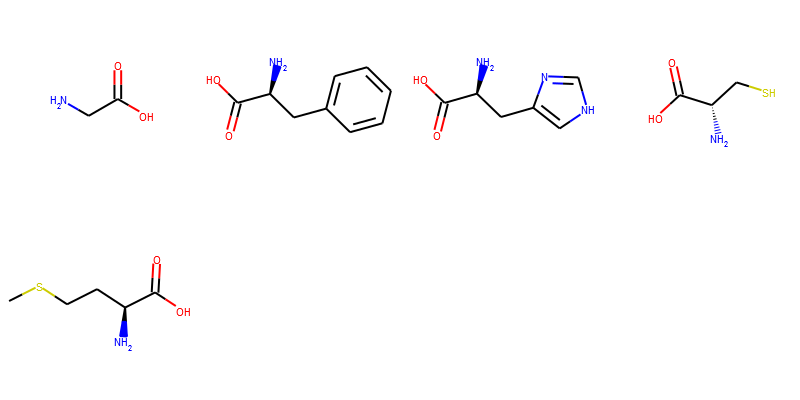

In [64]:
#if u want to collect the lists of amino acids strcuture in the list using smiles ID of it ! 
smiles_list = ['C(C(=O)O)N', 'N[C@@H](CC1=CC=CC=C1)C(O)=O','O=C([C@H](CC1=CNC=N1)N)O','C([C@@H](C(=O)O)N)S','CSCC[C@H](N)C(=O)O']

mol_list = []

for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow = 4)
img

In [65]:
#pattern_searching! 
#if u want to find any similarity in the structures we can do this! #here we are looking for SULPHUR PRESENT! 
pattern = Chem.MolFromSmiles('S')
for mol in mol_list:
    print(mol.HasSubstructMatch(pattern))

False
False
False
True
True


In [66]:
pattern = Chem.MolFromSmiles('C(=O)O')
for mol in mol_list:
    print(mol.HasSubstructMatch(pattern)) #all of them do have the COOH group! 

True
True
True
True
True


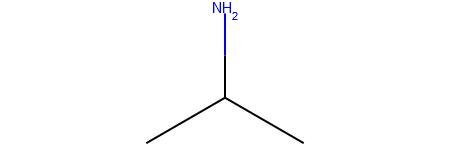

In [67]:
o1 = Chem.MolFromSmiles('CC(N)C')
o1

In [68]:
#MolFromSmarts gives us the functional group similarity finding! 
pattern = Chem.MolFromSmarts('[r5]')
for mol in mol_list: #here the 3rd one has the 5 membered ring thats imidazole! 
    print(mol.HasSubstructMatch(pattern))

False
False
True
False
False


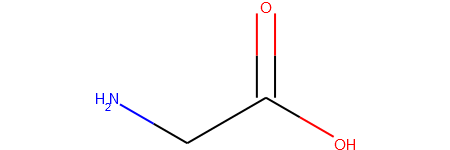

In [69]:
glycine = mol_list[0]
glycine

In [77]:
fp = AllChem.GetMorganFingerprintAsBitVect(glycine,2, nBits = 1024) #here 2 is no of bonds! 
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp,fp_arr) #1024 long array of list!
print(fp_arr)
print(np.nonzero(fp_arr))#it shows the index number where we have 1 ! others are 0!!
print(list(fp.GetOnBits())) 

[0. 0. 0. ... 0. 0. 0.]
(array([ 27,  80, 147, 389, 650, 713, 807, 893, 966, 981], dtype=int64),)
[27, 80, 147, 389, 650, 713, 807, 893, 966, 981]


In [78]:
bi = {}  #dictionary! 
fp = AllChem.GetMorganFingerprintAsBitVect(glycine,2, nBits = 1024, bitInfo = bi) 
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp,fp_arr) 
np.nonzero(fp_arr)

prints = [(glycine,x, bi) for x in fp.GetOnBits()]
prints


[(<rdkit.Chem.rdchem.Mol at 0x91dea80>,
  27,
  {27: ((0, 1),),
   80: ((0, 0),),
   147: ((4, 0),),
   389: ((3, 1),),
   650: ((2, 0),),
   713: ((1, 1),),
   807: ((1, 0), (3, 0)),
   893: ((2, 1),),
   966: ((0, 2),),
   981: ((4, 1),)}),
 (<rdkit.Chem.rdchem.Mol at 0x91dea80>,
  80,
  {27: ((0, 1),),
   80: ((0, 0),),
   147: ((4, 0),),
   389: ((3, 1),),
   650: ((2, 0),),
   713: ((1, 1),),
   807: ((1, 0), (3, 0)),
   893: ((2, 1),),
   966: ((0, 2),),
   981: ((4, 1),)}),
 (<rdkit.Chem.rdchem.Mol at 0x91dea80>,
  147,
  {27: ((0, 1),),
   80: ((0, 0),),
   147: ((4, 0),),
   389: ((3, 1),),
   650: ((2, 0),),
   713: ((1, 1),),
   807: ((1, 0), (3, 0)),
   893: ((2, 1),),
   966: ((0, 2),),
   981: ((4, 1),)}),
 (<rdkit.Chem.rdchem.Mol at 0x91dea80>,
  389,
  {27: ((0, 1),),
   80: ((0, 0),),
   147: ((4, 0),),
   389: ((3, 1),),
   650: ((2, 0),),
   713: ((1, 1),),
   807: ((1, 0), (3, 0)),
   893: ((2, 1),),
   966: ((0, 2),),
   981: ((4, 1),)}),
 (<rdkit.Chem.rdchem.Mol a

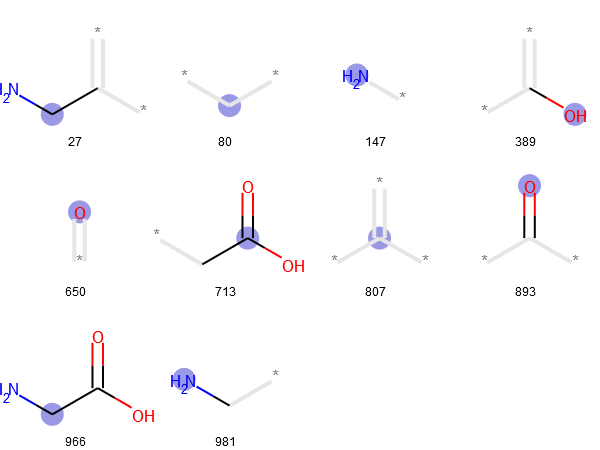

In [80]:
#glycine fingerprints! 
prints = [(glycine,x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow = 4, legends = [str(x) for x in fp.GetOnBits()])

In [81]:
#above we have 10 sub structure in the GLYCINE ! 

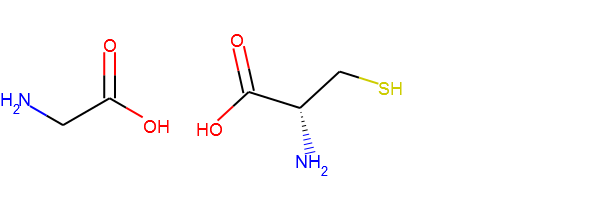

In [82]:
cysteine = mol_list[3]
img = Draw.MolsToGridImage([glycine, cysteine])
img

In [83]:
fp1 = AllChem.GetMorganFingerprint(cysteine, 2) #this is how we compare the two strucrutes and get the similarity percentage!
fp2 = AllChem.GetMorganFingerprint(glycine, 2)
DataStructs.TanimotoSimilarity(fp1, fp2) #0.33 33% of similarity between two molecules!

0.3333333333333333

In [93]:
fp3 = AllChem.GetMorganFingerprintAsBitVect(cysteine, 2, nBits = 1024, bitInfo = bi)
print('cysteine', list(fp3.GetOnBits()))
print('glycine', list(fp.GetOnBits()))


common = set(fp3.GetOnBits()) & set(fp.GetOnBits())
combined = set(fp3.GetOnBits()) | set(fp.GetOnBits())
print(common) #common finding! 
print(combined)
print(len(common)/len(combined))

cysteine [1, 48, 80, 147, 229, 321, 389, 403, 435, 650, 786, 807, 820, 825, 893, 902]
glycine [27, 80, 147, 389, 650, 713, 807, 893, 966, 981]
{389, 807, 650, 80, 147, 893}
{1, 321, 389, 902, 966, 713, 650, 80, 786, 147, 403, 981, 27, 229, 807, 48, 435, 820, 825, 893}
0.3


In [95]:
DataStructs.TanimotoSimilarity(fp3, fp) #both are same ! 

0.3